In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import matplotlib.image as mpimg

In [15]:
img_size = 224
cmap = 'Pastel1'

# get the image from URL
def get_image(img_url):
    filename = 'plastic.jpg'
    #img_url="https://www.google.com/url?sa=i&url=https%3A%2F%2Feia-international.org%2Focean%2Fplastic-pollution%2F&psig=AOvVaw2BvyEOfATMG4aFHa3juNxs&ust=1740320761942000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCID5yJe-14sDFQAAAAAdAAAAABAK.jpg"
    urllib.request.urlretrieve(img_url, filename)
    
# image preprocessing
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [img_size,img_size])
    img_size = 224
cmap = 'Pastel1'

# get the image from URL
def get_image(img_url):
    filename ='plastic.jpg'
    #img_url="https://www.google.com/url?sa=i&url=https%3A%2F%2Feia-international.org%2Focean%2Fplastic-pollution%2F&psig=AOvVaw2BvyEOfATMG4aFHa3juNxs&ust=1740320761942000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCID5yJe-14sDFQAAAAAdAAAAABAK.jpg"
    urllib.request.urlretrieve(img_url, filename)
    
# image preprocessing
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [img_size,img_size])
    return image

# image normalization
def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

# plot the image 
def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap=cmap)
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = cmap)
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = cmap)
    plt.axis("off")
    
# --------------- get the model ---------------

test_model = tf.keras.applications.resnet50.ResNet50()

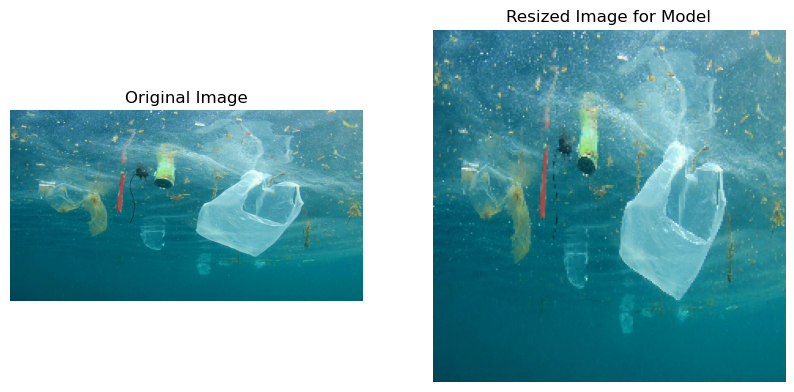

33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
1: plastic_bag (78.73%)
2: jellyfish (8.34%)
3: snorkel (5.06%)
4: electric_ray (3.07%)
5: scuba_diver (1.71%)


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Define the correct image path
image_path = r"C:/Users/sargu/Downloads/PLASTIC.jpg"

# Load the image correctly
og_image = mpimg.imread(image_path)

# Resize image to match the model input size
img = cv2.resize(og_image, (224, 224))  # ResNet and DenseNet require 224x224 input
input_img = np.expand_dims(img, axis=0)  # Add batch dimension
input_img = tf.keras.applications.densenet.preprocess_input(input_img)  # Preprocess

# Plot the original and processed image
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(og_image)
plt.axis("off")
plt.title("Original Image")

# Show the preprocessed image
plt.subplot(1, 2, 2)
plt.imshow(img)  # Show resized image for reference
plt.axis("off")
plt.title("Resized Image for Model")

plt.show()

# Load DenseNet model
test_model = tf.keras.applications.DenseNet121(weights="imagenet")

# Predict
result = test_model(input_img)
max_idx = tf.argmax(result, axis=1)

# Decode predictions
decoded_predictions = tf.keras.applications.imagenet_utils.decode_predictions(result.numpy())

# Print top predictions
for i, pred in enumerate(decoded_predictions[0]):
    print(f"{i+1}: {pred[1]} ({pred[2]*100:.2f}%)")


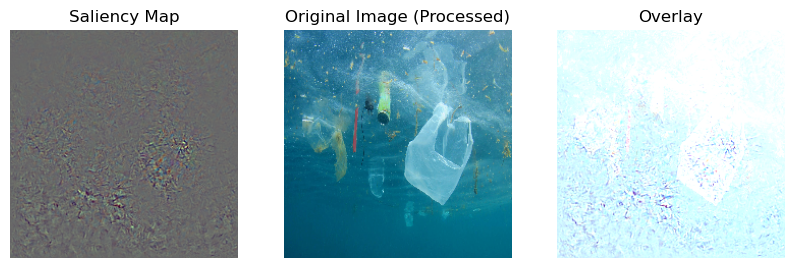

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Define image path
image_path = r"C:/Users/sargu/Downloads/PLASTIC.jpg"

# Load and preprocess the image
og_image = mpimg.imread(image_path)
img = cv2.resize(og_image, (224, 224))  # Resize to model input size
input_img = np.expand_dims(img, axis=0)  # Add batch dimension
input_img = tf.keras.applications.densenet.preprocess_input(input_img)  # Preprocess

# ✅ Convert NumPy array to TensorFlow Variable
input_img = tf.Variable(input_img, dtype=tf.float32)  

# Load DenseNet model
test_model = tf.keras.applications.DenseNet121(weights="imagenet")

# Compute gradients using GradientTape
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_idx = tf.argmax(result, axis=1).numpy()[0]  # Convert tensor to int
    max_score = result[0, max_idx]

# Compute gradients
grads = tape.gradient(max_score, input_img)

# Normalize gradients
def normalize_image(img):
    img = img - tf.reduce_min(img)  # Shift min to 0
    img = img / (tf.reduce_max(img) + 1e-8)  # Scale to 0-1
    return img.numpy()

# Saliency Mapping Function
def plot_maps(img1, img2, vmin=0.3, vmax=0.7, mix_val=2):
    cmap = "jet"  # Define color map
    f = plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img1, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.axis("off")
    plt.title("Saliency Map")

    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap=cmap)
    plt.axis("off")
    plt.title("Original Image (Processed)")
    
    plt.subplot(1, 3, 3)
    combined = img1 * mix_val + img2 / mix_val
    combined = np.clip(combined, 0, 1)  # Normalize
    plt.imshow(combined, cmap=cmap)
    plt.axis("off")
    plt.title("Overlay")

    plt.show()

# Plot the saliency map
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))
